In [4]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD'

In [6]:
mvc = pd.read_csv(url, encoding='latin1')
mvc.head()

/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/14/2017,0:00,BRONX,10451,40.826855,-73.922676,"(40.826855, -73.922676)",EAST 161 STREET,GRAND CONCOURSE,NaN,...,NaN,NaN,NaN,NaN,3789930,SPORT UTILITY / STATION WAGON,TK,NaN,NaN,NaN
1,11/14/2017,0:00,BROOKLYN,11218,40.647694,-73.980370,"(40.647694, -73.98037)",MC DONALD AVENUE,FORT HAMILTON PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,3789965,PASSENGER VEHICLE,TK,NaN,NaN,NaN
2,11/14/2017,0:00,QUEENS,11040,40.753067,-73.706650,"(40.753067, -73.70665)",NaN,NaN,76-08 270 STREET,...,Unspecified,NaN,NaN,NaN,3790153,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
3,11/14/2017,0:00,QUEENS,11412,40.699550,-73.747734,"(40.69955, -73.747734)",FRANCIS LEWIS BOULEVARD,115 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3790160,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
4,11/14/2017,0:00,NaN,NaN,40.691353,-73.921420,"(40.691353, -73.92142)",LINDEN STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3790499,SPORT UTILITY / STATION WAGON,TAXI,NaN,NaN,NaN


In [7]:
mvc.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [8]:
mvc.shape

(1154359, 29)

In [9]:
df = mvc.copy()

In [10]:
df = df.drop(['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'], axis=1)

In [11]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'],
      dtype='object')

In [12]:
df.head(2)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,11/14/2017,0:00,BRONX,10451,40.826855,-73.922676,"(40.826855, -73.922676)",0,0,0,0,0,0,0,0,Following Too Closely,NaN,3789930,SPORT UTILITY / STATION WAGON,TK
1,11/14/2017,0:00,BROOKLYN,11218,40.647694,-73.980370,"(40.647694, -73.98037)",0,0,0,0,0,0,0,0,Unspecified,Unspecified,3789965,PASSENGER VEHICLE,TK


In [13]:
df = df.drop_duplicates(subset='UNIQUE KEY', keep='first', inplace=False) 

In [14]:
import datetime as dt

In [15]:
df['DATE'] = pd.to_datetime(df.DATE)

In [19]:
df['Year'] = df['DATE'].dt.strftime('%Y')
df['Month'] = df['DATE'].dt.strftime('%m')

In [355]:
statyear = pd.value_counts(df['Year'])

In [356]:
statyear

2016    227800
2015    217650
2014    206005
2013    203720
2017    198649
2012    100535
Name: Year, dtype: int64

In [361]:
statyear_ = pd.DataFrame(statyear)

In [362]:
statyear_ = statyear_.reset_index()
statyear_

,index,Year
0,2016,227800
1,2015,217650
2,2014,206005
3,2013,203720
4,2017,198649
5,2012,100535


In [363]:
statyear_.index = statyear_.index.astype(int)
statyear_

,index,Year
0,2016,227800
1,2015,217650
2,2014,206005
3,2013,203720
4,2017,198649
5,2012,100535


In [110]:
import seaborn as sns

In [364]:
statyear_ = statyear_[statyear_["index"] > 2012]
statyear_

,index,Year
0,2016,227800
1,2015,217650
2,2014,206005
3,2013,203720
4,2017,198649


(array([      0.,   50000.,  100000.,  150000.,  200000.,  250000.]),
 <a list of 6 Text yticklabel objects>)

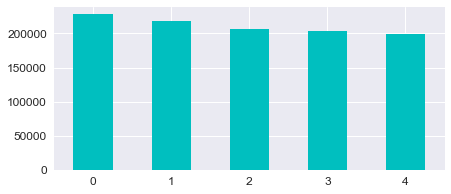

In [366]:
statyear_['Year'].plot(kind='bar', figsize=(7, 3), color='c')
pl.xticks(rotation=0, fontsize=12)
pl.yticks(fontsize=12)

In [147]:
df['Year'] = df.Year.astype(int)

In [323]:
y2016 = df[df['Year'] == 2016]
y2016.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month
100511,2016-12-30,17:11,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,Unspecified,NaN,3592196,TAXI,NaN,2016,12
198107,2016-12-31,10:30,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,Backing Unsafely,Unspecified,3589752,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,2016,12
198651,2016-12-31,0:00,BRONX,10472,40.826258,-73.882463,"(40.8262577, -73.8824631)",0,0,0,...,0,0,0,Passing or Lane Usage Improper,Unspecified,3590517,TAXI,NaN,2016,12
198652,2016-12-31,0:00,BROOKLYN,11217,40.684475,-73.974058,"(40.6844745, -73.9740576)",0,0,0,...,0,0,0,Unspecified,NaN,3589691,SPORT UTILITY / STATION WAGON,NaN,2016,12
198653,2016-12-31,0:00,BROOKLYN,11221,40.685180,-73.933487,"(40.6851801, -73.9334866)",0,0,0,...,0,0,0,Unspecified,NaN,3590605,SPORT UTILITY / STATION WAGON,NaN,2016,12


In [324]:
y2016.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'Year',
       'Month'],
      dtype='object')

In [326]:
y2016 = y2016.drop(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
                    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
                    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                    'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'Year','Month'], axis=1)

In [328]:
y2016 = y2016.dropna()

In [331]:
y2016.head()

,LATITUDE,LONGITUDE,LOCATION
198651,40.826258,-73.882463,"(40.8262577, -73.8824631)"
198652,40.684475,-73.974058,"(40.6844745, -73.9740576)"
198653,40.685180,-73.933487,"(40.6851801, -73.9334866)"
198654,40.646707,-73.965467,"(40.6467068, -73.965467)"
198655,40.820437,-73.936227,"(40.8204372, -73.9362273)"


In [332]:
y2016.to_csv('accident2016.csv')

In [151]:
ym = df[df['Year']!= 2017].copy()
ym = ym[ym['Year']!= 2012]
ym.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month
100511,2016-12-30,17:11,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,Unspecified,NaN,3592196,TAXI,NaN,2016,12
198107,2016-12-31,10:30,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,Backing Unsafely,Unspecified,3589752,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,2016,12
198651,2016-12-31,0:00,BRONX,10472,40.826258,-73.882463,"(40.8262577, -73.8824631)",0,0,0,...,0,0,0,Passing or Lane Usage Improper,Unspecified,3590517,TAXI,NaN,2016,12
198652,2016-12-31,0:00,BROOKLYN,11217,40.684475,-73.974058,"(40.6844745, -73.9740576)",0,0,0,...,0,0,0,Unspecified,NaN,3589691,SPORT UTILITY / STATION WAGON,NaN,2016,12
198653,2016-12-31,0:00,BROOKLYN,11221,40.685180,-73.933487,"(40.6851801, -73.9334866)",0,0,0,...,0,0,0,Unspecified,NaN,3590605,SPORT UTILITY / STATION WAGON,NaN,2016,12


In [152]:
ym = ym.groupby(['Year', 'Month']).size().reset_index()
ym.head()

,Year,Month,0
0,2013,01,15643
1,2013,02,14396
2,2013,03,16507
3,2013,04,16438
4,2013,05,18485


In [153]:
ym.columns

Index(['Year', 'Month', 0], dtype='object')

In [154]:
table = ym.pivot_table(index='Year',columns='Month',values=0)
table

Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2013,15643,14396,16507,16438,18485,18204,17577,16754,16955,17713,17768,17280
2014,16673,15735,15859,16371,18274,18408,17456,17093,17828,18084,16980,17244
2015,16122,15712,17948,16789,19272,18819,18768,18973,18513,19848,18019,18867
2016,18097,15982,18519,18362,20074,19466,19884,19691,19500,19675,19320,19230


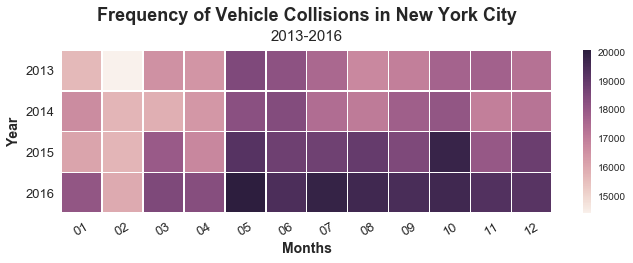

In [189]:
pl.figure(figsize=(11,3))
pl.suptitle('Frequency of Vehicle Collisions in New York City',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('2013-2016',fontsize=15,y=1.02)
sns.heatmap(table, linewidths=0.5)
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=30, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

In [185]:
ymt = df.groupby(['Year', 'Month']).size().reset_index()
ymtable = ymt.pivot_table(index='Year',columns='Month',values=0)
ymtable

Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,16990.0,17140.0,16535.0,16863.0,15888.0,17119.0
2013,15643.0,14396.0,16507.0,16438.0,18485.0,18204.0,17577.0,16754.0,16955.0,17713.0,17768.0,17280.0
2014,16673.0,15735.0,15859.0,16371.0,18274.0,18408.0,17456.0,17093.0,17828.0,18084.0,16980.0,17244.0
2015,16122.0,15712.0,17948.0,16789.0,19272.0,18819.0,18768.0,18973.0,18513.0,19848.0,18019.0,18867.0
2016,18097.0,15982.0,18519.0,18362.0,20074.0,19466.0,19884.0,19691.0,19500.0,19675.0,19320.0,19230.0
2017,17288.0,15669.0,19189.0,17719.0,20893.0,21234.0,19471.0,18924.0,19382.0,20049.0,8831.0,NaN


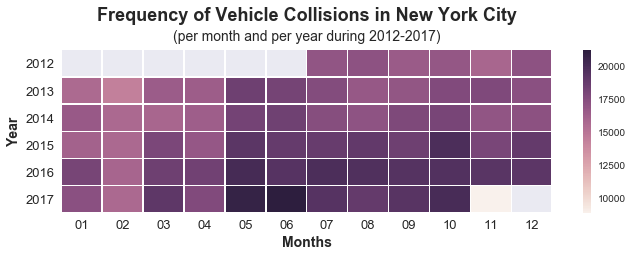

In [635]:
pl.figure(figsize=(11,3))
pl.suptitle('Frequency of Vehicle Collisions in New York City',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('(per month and per year during 2012-2017)',fontsize=14,y=1.02)
sns.heatmap(ymtable, linewidths=0.5)
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

In [19]:
pd.value_counts(mvc['BOROUGH'])

BROOKLYN         253350
QUEENS           215016
MANHATTAN        208829
BRONX            109435
STATEN ISLAND     37982
Name: BOROUGH, dtype: int64

In [196]:
sumall = df.groupby(['Year', 'Month']).sum().reset_index()
sumall.head()


,Year,Month,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
0,2012,07,589815.669527,-1.070781e+06,4855,22,855,6,450,3,3550,13,8002809118
1,2012,08,591439.536630,-1.073764e+06,4750,27,850,15,507,1,3393,11,8432654084
2,2012,09,574179.219528,-1.042394e+06,4689,26,893,13,434,1,3362,12,7790616930
3,2012,10,581920.216678,-1.056455e+06,4572,21,977,13,329,1,3260,7,7968470292
4,2012,11,548421.463465,-9.957581e+05,3994,14,1037,8,276,0,2681,6,7571403240


In [237]:
sumall.describe()

,Year,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
count,65.000000,65.000000,6.500000e+01,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01
mean,2014.692308,590547.479670,-1.072082e+06,4558.630769,21.369231,924.738462,11.830769,368.861538,1.415385,3289.769231,8.138462,4.064264e+10
std,1.600030,113812.737445,2.066859e+05,682.128277,5.572166,173.732218,4.342987,153.624428,1.285646,557.679309,3.613676,2.731607e+10
min,2012.000000,102488.073500,-1.482491e+06,2158.000000,11.000000,469.000000,4.000000,82.000000,0.000000,1506.000000,3.000000,6.587252e+09
25%,2013.000000,568995.492971,-1.142795e+06,4186.000000,17.000000,802.000000,8.000000,234.000000,0.000000,2943.000000,6.000000,8.589829e+09
50%,2015.000000,593641.526727,-1.077785e+06,4659.000000,22.000000,905.000000,12.000000,400.000000,1.000000,3347.000000,7.000000,5.379958e+10
75%,2016.000000,629528.112523,-1.033075e+06,4992.000000,26.000000,1009.000000,15.000000,489.000000,2.000000,3643.000000,11.000000,6.472322e+10
max,2017.000000,816405.739808,-1.860511e+05,5684.000000,36.000000,1590.000000,26.000000,678.000000,6.000000,4253.000000,22.000000,7.842159e+10


In [254]:
sumall.columns

Index(['Year', 'Month', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'UNIQUE KEY'],
      dtype='object')

In [255]:
injured = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF PERSONS INJURED')
injured

Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,4855.0,4750.0,4689.0,4572.0,3994.0,4587.0
2013,4043.0,3561.0,4186.0,4437.0,5025.0,5110.0,5088.0,4848.0,4992.0,4842.0,4704.0,4285.0
2014,3921.0,3106.0,3855.0,4048.0,4659.0,4985.0,4605.0,4478.0,4465.0,4722.0,4243.0,4126.0
2015,3484.0,3005.0,3678.0,3924.0,4826.0,4656.0,4728.0,4800.0,4518.0,4817.0,4361.0,4555.0
2016,3690.0,3466.0,4687.0,5060.0,5475.0,4932.0,5411.0,5509.0,5493.0,5195.0,5086.0,4883.0
2017,4447.0,3899.0,4418.0,4527.0,5441.0,5684.0,5397.0,5279.0,5542.0,5499.0,2158.0,NaN


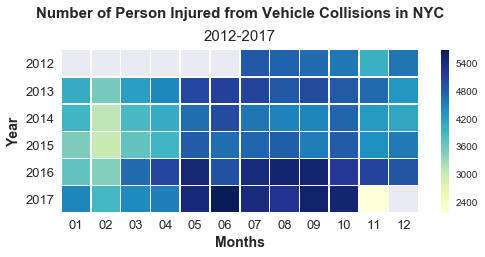

In [370]:
pl.figure(figsize=(8,3))
pl.suptitle('Number of Person Injured from Vehicle Collisions in NYC',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(injured, linewidths=0.5, cmap='YlGnBu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

In [257]:
killed = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF PERSONS KILLED')

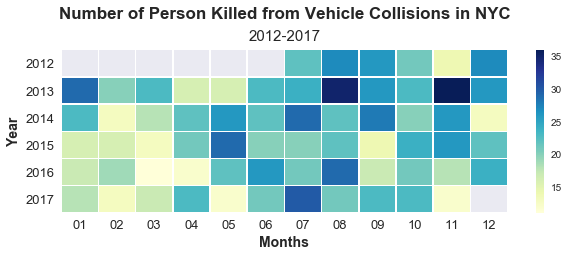

In [258]:
pl.figure(figsize=(10,3))
pl.suptitle('Number of Person Killed from Vehicle Collisions in NYC',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(killed, linewidths=0.5, cmap='YlGnBu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

In [259]:
pedinj = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF PEDESTRIANS INJURED')
pedkil = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF PEDESTRIANS KILLED')
cycinj = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF CYCLIST INJURED')
cyckil = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF CYCLIST KILLED')
motinj = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF MOTORIST INJURED')
motkil = sumall.pivot_table(index='Year',columns='Month',values='NUMBER OF MOTORIST KILLED')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

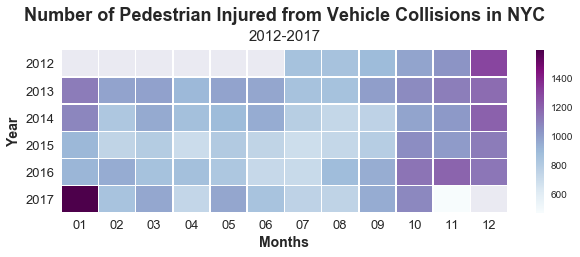

In [260]:
pl.figure(figsize=(10,3))
pl.suptitle('Number of Pedestrian Injured from Vehicle Collisions in NYC',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(pedinj, linewidths=0.5, cmap='BuPu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

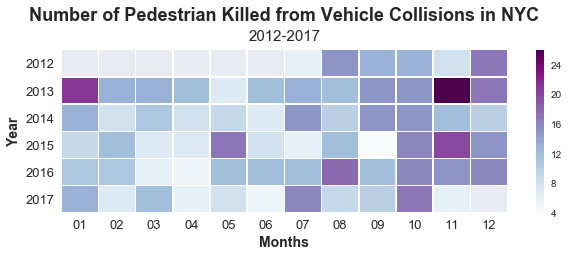

In [261]:
pl.figure(figsize=(10,3))
pl.suptitle('Number of Pedestrian Killed from Vehicle Collisions in NYC',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(pedkil, linewidths=0.5, cmap='BuPu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

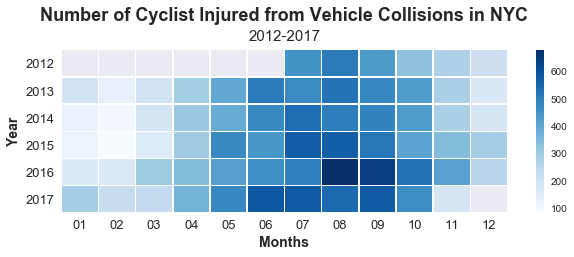

In [262]:
pl.figure(figsize=(10,3))
pl.suptitle('Number of Cyclist Injured from Vehicle Collisions in NYC',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(cycinj, linewidths=0.5, cmap='Blues')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

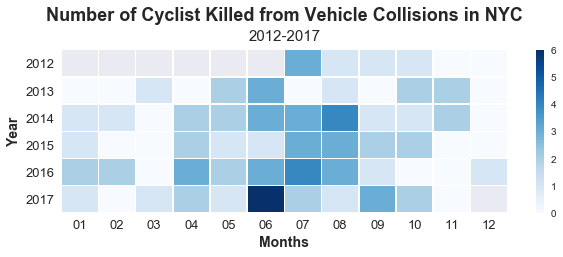

In [263]:
pl.figure(figsize=(10,3))
pl.suptitle('Number of Cyclist Killed from Vehicle Collisions in NYC',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(cyckil, linewidths=0.5, cmap='Blues')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

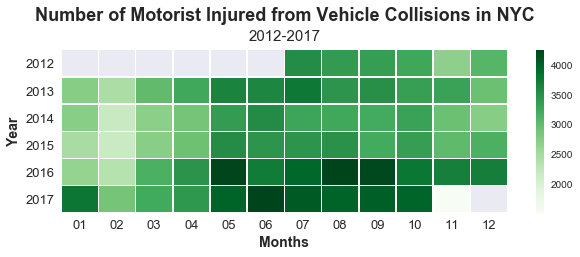

In [264]:
pl.figure(figsize=(10,3))
pl.suptitle('Number of Motorist Injured from Vehicle Collisions in NYC',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(motinj, linewidths=0.5, cmap='Greens')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

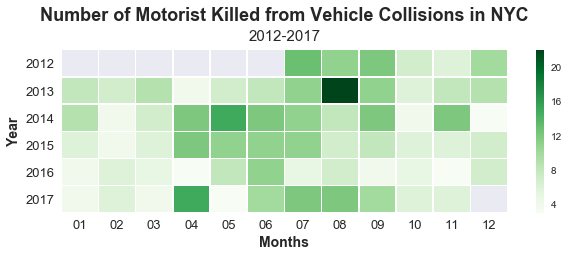

In [265]:
pl.figure(figsize=(10,3))
pl.suptitle('Number of Motorist Killed from Vehicle Collisions in NYC',fontsize=18,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(motkil, linewidths=0.5, cmap='Greens')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

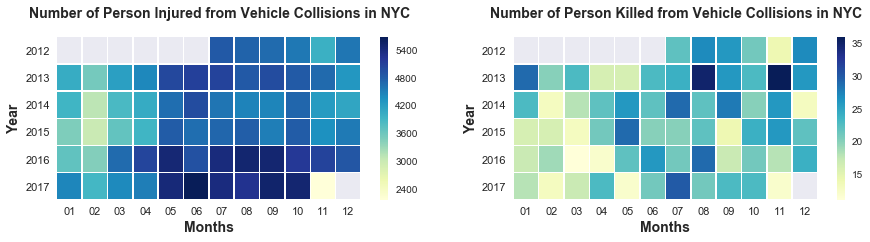

In [384]:
fig = pl.figure(figsize=(15,3))
fig.add_subplot(1,2,1)
pl.title('Number of Person Injured from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(injured, linewidths=0.5, cmap='YlGnBu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)

fig.add_subplot(1,2,2)
pl.title('Number of Person Killed from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(killed, linewidths=0.5, cmap='YlGnBu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)
pl.show()

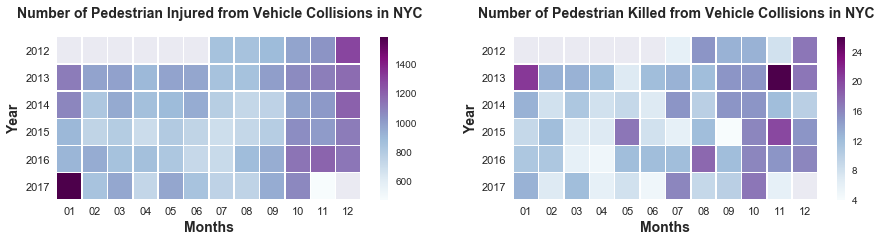

In [386]:
fig = pl.figure(figsize=(15,3))
fig.add_subplot(1,2,1)
pl.title('Number of Pedestrian Injured from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(pedinj, linewidths=0.5, cmap='BuPu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)

fig.add_subplot(1,2,2)
pl.title('Number of Pedestrian Killed from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(pedkil, linewidths=0.5, cmap='BuPu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)
pl.show()

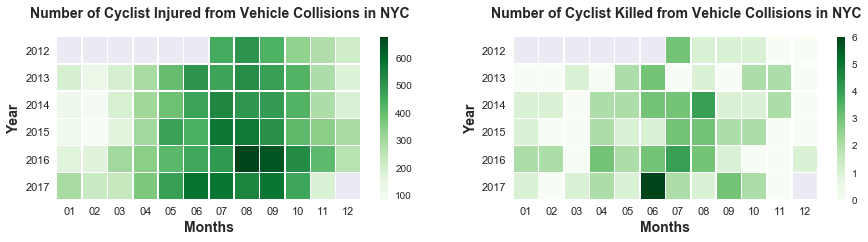

In [391]:
fig = pl.figure(figsize=(15,3))
fig.add_subplot(1,2,1)
pl.title('Number of Cyclist Injured from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(cycinj, linewidths=0.5, cmap='Greens')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)

fig.add_subplot(1,2,2)
pl.title('Number of Cyclist Killed from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(cyckil, linewidths=0.5, cmap='Greens')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)
pl.show()

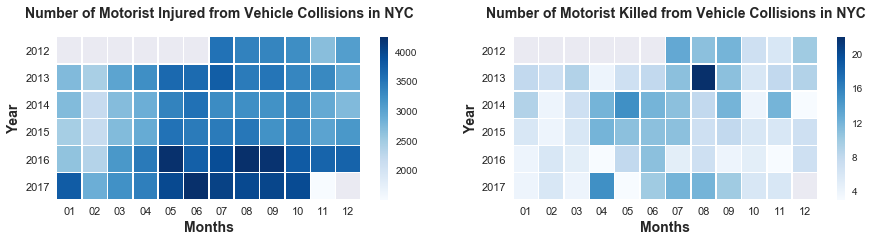

In [392]:
fig = pl.figure(figsize=(15,3))
fig.add_subplot(1,2,1)
pl.title('Number of Motorist Injured from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(motinj, linewidths=0.5, cmap='Blues')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)

fig.add_subplot(1,2,2)
pl.title('Number of Motorist Killed from Vehicle Collisions in NYC',fontsize=14,fontweight='bold',y=1.08, x=0.535)
sns.heatmap(motkil, linewidths=0.5, cmap='Blues')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=11)
pl.yticks(fontsize=11, rotation=0)
pl.show()

In [266]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'Year',
       'Month'],
      dtype='object')

In [267]:
con = df.groupby(['Year', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index()
con.head()

,Year,CONTRIBUTING FACTOR VEHICLE 1,0
0,2012,Accelerator Defective,56
1,2012,Aggressive Driving/Road Rage,362
2,2012,Alcohol Involvement,742
3,2012,Animals Action,40
4,2012,Backing Unsafely,2311


In [268]:
contfactor = con.pivot_table(index='CONTRIBUTING FACTOR VEHICLE 1',columns='Year',values=0)

In [270]:
contfactor

Year,2012,2013,2014,2015,2016,2017
CONTRIBUTING FACTOR VEHICLE 1,,,,,,
Accelerator Defective,56.0,74.0,105.0,83.0,83.0,98.0
Aggressive Driving/Road Rage,362.0,553.0,610.0,796.0,561.0,862.0
Alcohol Involvement,742.0,1517.0,1794.0,1833.0,1523.0,2172.0
Animals Action,40.0,83.0,104.0,103.0,154.0,170.0
Backing Unsafely,2311.0,4874.0,6075.0,7126.0,5886.0,9722.0
Brakes Defective,278.0,560.0,499.0,597.0,432.0,672.0
Cell Phone (hand-held),7.0,21.0,17.0,30.0,32.0,79.0
Cell Phone (hands-free),28.0,48.0,43.0,70.0,19.0,10.0
Driver Inattention/Distraction,10407.0,22316.0,24786.0,32009.0,30056.0,47265.0


In [284]:
# delete outlier
con_ = con[con['CONTRIBUTING FACTOR VEHICLE 1']!= 'Unspecified']
# drop nan
con_ = con_.dropna()

In [288]:
contfactor_.describe()

Year,2012,2013,2014,2015,2016,2017
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,889.782609,1833.630435,2108.586957,2600.369565,2069.847826,3206.565217
std,1794.153789,3802.670257,4304.964434,5540.617801,4678.372281,7774.144837
min,4.000000,5.000000,7.000000,7.000000,7.000000,3.000000
25%,43.750000,74.250000,108.000000,97.750000,153.250000,87.500000
50%,193.000000,341.500000,388.500000,450.500000,561.500000,431.000000
75%,1003.000000,2124.500000,2408.750000,2720.750000,2085.250000,2862.750000
max,10407.000000,22316.000000,24786.000000,32009.000000,30056.000000,47265.000000


In [286]:
contfactor_ = con_.pivot_table(index='CONTRIBUTING FACTOR VEHICLE 1',columns='Year',values=0)
contfactor_ = contfactor_.dropna()

Year,2012,2013,2014,2015,2016,2017
CONTRIBUTING FACTOR VEHICLE 1,,,,,,
Accelerator Defective,56.0,74.0,105.0,83.0,83.0,98.0
Aggressive Driving/Road Rage,362.0,553.0,610.0,796.0,561.0,862.0
Alcohol Involvement,742.0,1517.0,1794.0,1833.0,1523.0,2172.0
Animals Action,40.0,83.0,104.0,103.0,154.0,170.0
Backing Unsafely,2311.0,4874.0,6075.0,7126.0,5886.0,9722.0
Brakes Defective,278.0,560.0,499.0,597.0,432.0,672.0
Cell Phone (hand-held),7.0,21.0,17.0,30.0,32.0,79.0
Cell Phone (hands-free),28.0,48.0,43.0,70.0,19.0,10.0
Driver Inattention/Distraction,10407.0,22316.0,24786.0,32009.0,30056.0,47265.0


In [300]:
contfactor_['sum'] = contfactor_.sum(axis=1)
contfactor_

Year,2012,2013,2014,2015,2016,2017,sum
CONTRIBUTING FACTOR VEHICLE 1,,,,,,,
Accelerator Defective,56.0,74.0,105.0,83.0,83.0,98.0,1497.0
Aggressive Driving/Road Rage,362.0,553.0,610.0,796.0,561.0,862.0,11232.0
Alcohol Involvement,742.0,1517.0,1794.0,1833.0,1523.0,2172.0,28743.0
Animals Action,40.0,83.0,104.0,103.0,154.0,170.0,1962.0
Backing Unsafely,2311.0,4874.0,6075.0,7126.0,5886.0,9722.0,107982.0
Brakes Defective,278.0,560.0,499.0,597.0,432.0,672.0,9114.0
Cell Phone (hand-held),7.0,21.0,17.0,30.0,32.0,79.0,558.0
Cell Phone (hands-free),28.0,48.0,43.0,70.0,19.0,10.0,654.0
Driver Inattention/Distraction,10407.0,22316.0,24786.0,32009.0,30056.0,47265.0,500517.0


In [299]:
contfactor_.describe()

Year,2012,2013,2014,2015,2016,2017,sum
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,889.782609,1833.630435,2108.586957,2600.369565,2069.847826,3206.565217,25417.565217
std,1794.153789,3802.670257,4304.964434,5540.617801,4678.372281,7774.144837,53175.964590
min,4.000000,5.000000,7.000000,7.000000,7.000000,3.000000,98.000000
25%,43.750000,74.250000,108.000000,97.750000,153.250000,87.500000,1511.000000
50%,193.000000,341.500000,388.500000,450.500000,561.500000,431.000000,6782.000000
75%,1003.000000,2124.500000,2408.750000,2720.750000,2085.250000,2862.750000,24946.000000
max,10407.000000,22316.000000,24786.000000,32009.000000,30056.000000,47265.000000,333678.000000


In [302]:
contop = contfactor_[contfactor_['sum'] > 30000]
contop

Year,2012,2013,2014,2015,2016,2017,sum
CONTRIBUTING FACTOR VEHICLE 1,,,,,,,
Backing Unsafely,2311.0,4874.0,6075.0,7126.0,5886.0,9722.0,107982.0
Driver Inattention/Distraction,10407.0,22316.0,24786.0,32009.0,30056.0,47265.0,500517.0
Driver Inexperience,1252.0,2384.0,2599.0,2752.0,2256.0,3766.0,45027.0
Failure to Yield Right-of-Way,3928.0,8028.0,8944.0,10549.0,8934.0,13764.0,162441.0
Fatigued/Drowsy,5010.0,10286.0,12118.0,15480.0,5316.0,247.0,145371.0
Following Too Closely,72.0,145.0,130.0,148.0,6898.0,20125.0,82554.0
Lost Consciousness,2168.0,4141.0,4996.0,6290.0,2453.0,188.0,60708.0
Other Vehicular,2473.0,5101.0,7005.0,10524.0,4462.0,5324.0,104667.0
Outside Car Distraction,1330.0,2613.0,2603.0,2843.0,1038.0,459.0,32658.0


In [303]:
contop15 = contop.drop(['sum'], axis=1)

In [313]:
contop15

Year,2012,2013,2014,2015,2016,2017
CONTRIBUTING FACTOR VEHICLE 1,,,,,,
Backing Unsafely,2311.0,4874.0,6075.0,7126.0,5886.0,9722.0
Driver Inattention/Distraction,10407.0,22316.0,24786.0,32009.0,30056.0,47265.0
Driver Inexperience,1252.0,2384.0,2599.0,2752.0,2256.0,3766.0
Failure to Yield Right-of-Way,3928.0,8028.0,8944.0,10549.0,8934.0,13764.0
Fatigued/Drowsy,5010.0,10286.0,12118.0,15480.0,5316.0,247.0
Following Too Closely,72.0,145.0,130.0,148.0,6898.0,20125.0
Lost Consciousness,2168.0,4141.0,4996.0,6290.0,2453.0,188.0
Other Vehicular,2473.0,5101.0,7005.0,10524.0,4462.0,5324.0
Outside Car Distraction,1330.0,2613.0,2603.0,2843.0,1038.0,459.0


In [312]:
contop5 = contfactor_[contfactor_['sum'] > 100000]
contop5

Year,2012,2013,2014,2015,2016,2017,sum
CONTRIBUTING FACTOR VEHICLE 1,,,,,,,
Backing Unsafely,2311.0,4874.0,6075.0,7126.0,5886.0,9722.0,107982.0
Driver Inattention/Distraction,10407.0,22316.0,24786.0,32009.0,30056.0,47265.0,500517.0
Failure to Yield Right-of-Way,3928.0,8028.0,8944.0,10549.0,8934.0,13764.0,162441.0
Fatigued/Drowsy,5010.0,10286.0,12118.0,15480.0,5316.0,247.0,145371.0
Other Vehicular,2473.0,5101.0,7005.0,10524.0,4462.0,5324.0,104667.0


In [314]:
contop5 = contop5.drop(['sum'], axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text yticklabel objects>)

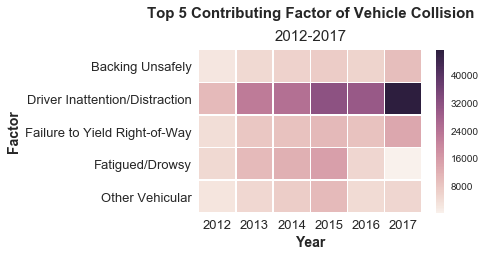

In [636]:
pl.figure(figsize=(5,3))
pl.suptitle('Top 5 Contributing Factors of Vehicle Collision',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(contop5, linewidths=0.5)
pl.xlabel('Year', fontsize=14, fontweight='bold')
pl.ylabel('Factor', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Text yticklabel objects>)

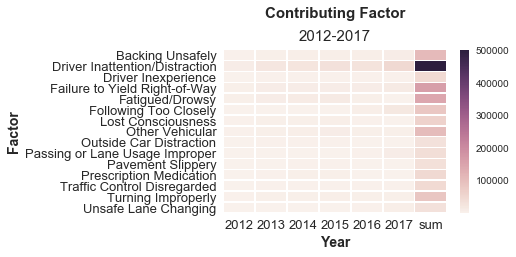

In [333]:
pl.figure(figsize=(5,3))
pl.suptitle('Contributing Factor',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(contop, linewidths=0.5)
pl.xlabel('Year', fontsize=14, fontweight='bold')
pl.ylabel('Factor', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

In [412]:
contfactor_['%2012'] = contfactor_[2012] / contfactor_[2012].sum()  * 100
contfactor_['%2013'] = contfactor_[2013] / contfactor_[2013].sum() * 100
contfactor_['%2014'] = contfactor_[2014] / contfactor_[2014].sum() * 100
contfactor_['%2015'] = contfactor_[2015] / contfactor_[2015].sum() * 100
contfactor_['%2016'] = contfactor_[2016] / contfactor_[2016].sum() * 100
contfactor_['%2017'] = contfactor_[2017] / contfactor_[2017].sum() * 100
contfactor_['%sum'] = contfactor_['sum'] / contfactor_['sum'].sum()

In [413]:
contfactor_.describe()

Year,2012,2013,2014,2015,2016,2017,sum,%2012,%2013,%2014,%2015,%2016,%2017,%sum
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,889.782609,1833.630435,2108.586957,2600.369565,2069.847826,3206.565217,38126.347826,2.173913,2.173913,2.173913,2.173913,2.173913,2.173913,0.021739
std,1794.153789,3802.670257,4304.964434,5540.617801,4678.372281,7774.144837,79763.946886,4.383469,4.508365,4.438336,4.631965,4.913586,5.270535,0.045480
min,4.000000,5.000000,7.000000,7.000000,7.000000,3.000000,147.000000,0.009773,0.005928,0.007217,0.005852,0.007352,0.002034,0.000084
25%,43.750000,74.250000,108.000000,97.750000,153.250000,87.500000,2266.500000,0.106890,0.088029,0.111346,0.081719,0.160955,0.059321,0.001292
50%,193.000000,341.500000,388.500000,450.500000,561.500000,431.000000,10173.000000,0.471537,0.404875,0.400536,0.376619,0.589730,0.292199,0.005801
75%,1003.000000,2124.500000,2408.750000,2720.750000,2085.250000,2862.750000,37419.000000,2.450525,2.518762,2.483375,2.274551,2.190090,1.940821,0.021336
max,10407.000000,22316.000000,24786.000000,32009.000000,30056.000000,47265.000000,500517.000000,25.426338,26.457373,25.553895,26.759574,31.567118,32.043633,0.285388


In [417]:
cont5percent = contfactor_[contfactor_['%sum'] > 0.05]
cont5percent

Year,2012,2013,2014,2015,2016,2017,sum,%2012,%2013,%2014,%2015,%2016,%2017,%sum
CONTRIBUTING FACTOR VEHICLE 1,,,,,,,,,,,,,,
Backing Unsafely,2311.0,4874.0,6075.0,7126.0,5886.0,9722.0,107982.0,5.646225,5.778510,6.263209,5.957347,6.181929,6.591097,0.061570
Driver Inattention/Distraction,10407.0,22316.0,24786.0,32009.0,30056.0,47265.0,500517.0,25.426338,26.457373,25.553895,26.759574,31.567118,32.043633,0.285388
Failure to Yield Right-of-Way,3928.0,8028.0,8944.0,10549.0,8934.0,13764.0,162441.0,9.596873,9.517825,9.221094,8.818981,9.383172,9.331399,0.092622
Fatigued/Drowsy,5010.0,10286.0,12118.0,15480.0,5316.0,247.0,145371.0,12.240410,12.194862,12.493427,12.941304,5.583271,0.167455,0.082889
Other Vehicular,2473.0,5101.0,7005.0,10524.0,4462.0,5324.0,104667.0,6.042023,6.047637,7.222022,8.798081,4.686335,3.609443,0.059680


In [419]:
cont5 = cont5percent.drop([2012,2013,2014,2015,2016,2017,'sum','%sum'], axis=1)
cont5.columns = [2012,2013,2014,2015,2016,2017]
cont5

,2012,2013,2014,2015,2016,2017
CONTRIBUTING FACTOR VEHICLE 1,,,,,,
Backing Unsafely,5.646225,5.778510,6.263209,5.957347,6.181929,6.591097
Driver Inattention/Distraction,25.426338,26.457373,25.553895,26.759574,31.567118,32.043633
Failure to Yield Right-of-Way,9.596873,9.517825,9.221094,8.818981,9.383172,9.331399
Fatigued/Drowsy,12.240410,12.194862,12.493427,12.941304,5.583271,0.167455
Other Vehicular,6.042023,6.047637,7.222022,8.798081,4.686335,3.609443


(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text yticklabel objects>)

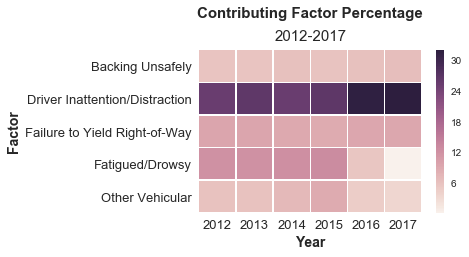

In [421]:
pl.figure(figsize=(5,3))
pl.suptitle('Contributing Factor Percentage',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('2012-2017',fontsize=15,y=1.02)
sns.heatmap(cont5, linewidths=0.5)
pl.xlabel('Year', fontsize=14, fontweight='bold')
pl.ylabel('Factor', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)

In [424]:
df2 = pd.read_csv("points_wzip_and_deaths.csv")

In [425]:
df2.columns

Index(['XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID', 'JOIN_FID',
       'FIELD1', 'BOROUGH', 'CONTRIBUTI', 'DATE', 'LATITUDE', 'LOCATION',
       'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1', 'NUMBER_O_2',
       'TIME', 'UNIQUE_KEY', 'VEHICLE_TY', 'HOUR', 'YEAR', 'MONTH', 'DDLAT',
       'DDLON', 'ORIG_OID', 'NRSPDHMP', 'SIGTIMING', 'INARTSLWZN', 'INSLWZN',
       'SPDLIMIT', 'ENHANCEDXG', 'LDGPEDINTS', 'ZIPCODE', 'BLDGZIP', 'PO_NAME',
       'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL',
       'SHAPE_AREA', 'SHAPE_LEN', 'DEATHS'],
      dtype='object')

In [427]:
df2.head(2)

,,XCoord,YCoord,FID,JOIN_COUNT,TARGET_FID,JOIN_FID,FIELD1,BOROUGH,CONTRIBUTI,DATE,...,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,DEATHS
-73.949748,40.797106,0,1,0,48,0,MANHATTAN,Driver Inattention/Distraction,2012-07-01 00:00:00,40.797097,{u'type': u'Point',...,34313.0,1.109268e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,0
-73.972997,40.608823,1,1,1,9,1,BROOKLYN,Driver Inattention/Distraction,2012-07-01 00:00:00,40.608814,{u'type': u'Point',...,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,0


In [430]:
df3 = df2.drop(['XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID', 'JOIN_FID',
       'FIELD1', 'BOROUGH', 'CONTRIBUTI', 'LATITUDE', 'LOCATION',
       'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1', 'NUMBER_O_2',
       'TIME', 'VEHICLE_TY', 'DDLAT',
       'DDLON', 'ORIG_OID', 'SPDLIMIT', 'ZIPCODE', 'BLDGZIP', 'PO_NAME',
       'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL',
       'SHAPE_AREA', 'SHAPE_LEN'], axis=1)

In [431]:
df3.head()

,,DATE,UNIQUE_KEY,HOUR,YEAR,MONTH,NRSPDHMP,SIGTIMING,INARTSLWZN,INSLWZN,ENHANCEDXG,LDGPEDINTS,DEATHS
-73.949748,40.797106,{u'type': u'Point',63606,18,2012,7,0,0,0,0,0,0,0
-73.972997,40.608823,{u'type': u'Point',116266,2,2012,7,0,0,0,0,0,0,0
-73.981927,40.670456,{u'type': u'Point',175814,20,2012,7,0,0,0,0,0,0,0
-73.940611,40.593816,{u'type': u'Point',116265,18,2012,7,0,1,0,0,0,1,0
-73.979282,40.723514,{u'type': u'Point',13866,4,2012,7,1,0,0,1,0,0,0


In [432]:
df3.columns

Index(['DATE', 'UNIQUE_KEY', 'HOUR', 'YEAR', 'MONTH', 'NRSPDHMP', 'SIGTIMING',
       'INARTSLWZN', 'INSLWZN', 'ENHANCEDXG', 'LDGPEDINTS', 'DEATHS'],
      dtype='object')

In [433]:
df4 = df3.drop(['DATE', 'UNIQUE_KEY', 'HOUR', 'YEAR', 'MONTH','DEATHS'], axis=1)
df4.head()

,,NRSPDHMP,SIGTIMING,INARTSLWZN,INSLWZN,ENHANCEDXG,LDGPEDINTS
-73.949748,40.797106,0,0,0,0,0,0
-73.972997,40.608823,0,0,0,0,0,0
-73.981927,40.670456,0,0,0,0,0,0
-73.940611,40.593816,0,1,0,0,0,1
-73.979282,40.723514,1,0,0,1,0,0


In [435]:
df4.columns

Index(['NRSPDHMP', 'SIGTIMING', 'INARTSLWZN', 'INSLWZN', 'ENHANCEDXG',
       'LDGPEDINTS'],
      dtype='object')

In [440]:
NRSPDHMP = pd.value_counts(df4['NRSPDHMP'])
SIGTIMING = pd.value_counts(df4['SIGTIMING'])
INARTSLWZN = pd.value_counts(df4['INARTSLWZN'])
INSLWZN = pd.value_counts(df4['INSLWZN'])
ENHANCEDXG = pd.value_counts(df4['ENHANCEDXG'])
LDGPEDINTS = pd.value_counts(df4['LDGPEDINTS'])

NUMERICAL FEATURES:
- Injuries - Number of total injuries
- PedInjurie - Number of pedestrian injuries
- PctPedInj - Percentage of injuries occurring that are pedestrian injuries
- SpdLm - Speed Limit where injury occurred
- RASTERVALU - Number of pedestrian fatalities (sorry, I could not edit the field name when it was made through a tool, and then they are permanent)
 
BINARY(0=no, 1=yes) FEATURES:
- InSlwZn - Occurred in a neighborhood slow zone
- InArtSlwZn - Occurred in an arterial slow zone
- InSigTimg - Occurred in a signal timing zone
- NrSpdHmp - Occurred near a speed hump
- NrEnhXing - Occurred near/in an enhanced crosswalk
- NrLdPedSig - Occurred near a leading pedestrian interval signal

In [616]:
df5 = pd.DataFrame({'Speed Hump': NRSPDHMP, 'Signal Timing': SIGTIMING, 'Arterial \nSlow Zone': INARTSLWZN, 'Neighborhood \nSlow Zone' : INSLWZN, 
                    'Enhanced \nCrosswalk' : ENHANCEDXG, 'Leading \npedestrian \ninterval \nsignal': LDGPEDINTS})

In [617]:
df5

,Arterial Slow Zone,Enhanced Crosswalk,Leading pedestrian interval signal,Neighborhood Slow Zone,Signal Timing,Speed Hump
0,35477,40251,29268,38686,28235,34810
1,4900,126,11109,1691,12142,5567


In [622]:
df5 = df5.rename({0: 'No', 1: 'Yes'})

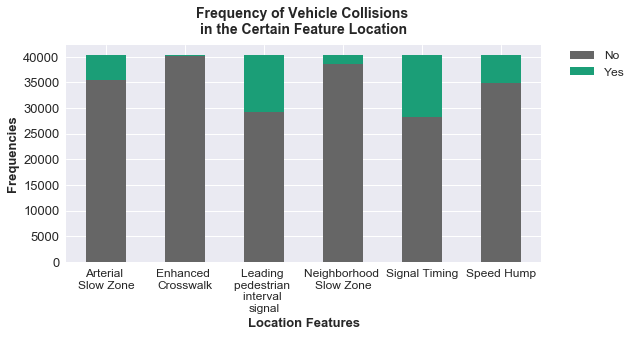

In [637]:
df5.T.plot(kind='bar', stacked=True, rot=1, figsize=(8.5, 4), cmap='Dark2_r')
pl.title('Frequency of Vehicle Collisions \nin the Certain Feature Location',fontsize=14,y=1.02, fontweight='bold')
pl.xlabel('Location Features', fontsize=13, fontweight='bold')
pl.ylabel('Frequencies', fontsize=13, fontweight='bold')
pl.xticks(rotation=0, fontsize=12)
pl.yticks(fontsize=13, rotation=0)
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, fontsize=12)

In [534]:
speedlimit = df2.groupby(['YEAR', 'MONTH']).mean().reset_index()
speedlimitmax = df2.groupby(['YEAR', 'MONTH']).max().reset_index()
speedlimitmed = df2.groupby(['YEAR', 'MONTH']).median().reset_index()

In [535]:
speedlimit.columns

Index(['YEAR', 'MONTH', 'XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID',
       'CONTRIBUTI', 'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1',
       'NUMBER_O_2', 'UNIQUE_KEY', 'HOUR', 'ORIG_OID', 'NRSPDHMP', 'SIGTIMING',
       'INARTSLWZN', 'INSLWZN', 'SPDLIMIT', 'ENHANCEDXG', 'LDGPEDINTS',
       'POPULATION', 'AREA', 'SHAPE_AREA', 'SHAPE_LEN', 'DEATHS'],
      dtype='object')

In [536]:
speedlimitmax.columns

Index(['YEAR', 'MONTH', 'XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID',
       'JOIN_FID', 'FIELD1', 'BOROUGH', 'CONTRIBUTI', 'DATE', 'LATITUDE',
       'LOCATION', 'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1',
       'NUMBER_O_2', 'TIME', 'UNIQUE_KEY', 'VEHICLE_TY', 'HOUR', 'DDLAT',
       'DDLON', 'ORIG_OID', 'NRSPDHMP', 'SIGTIMING', 'INARTSLWZN', 'INSLWZN',
       'SPDLIMIT', 'ENHANCEDXG', 'LDGPEDINTS', 'ZIPCODE', 'BLDGZIP', 'PO_NAME',
       'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL',
       'SHAPE_AREA', 'SHAPE_LEN', 'DEATHS'],
      dtype='object')

In [537]:
speedlimit = speedlimit.drop(['XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID',
       'CONTRIBUTI', 'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1',
       'NUMBER_O_2', 'UNIQUE_KEY', 'HOUR', 'ORIG_OID', 'NRSPDHMP', 'SIGTIMING',
       'INARTSLWZN', 'INSLWZN', 'ENHANCEDXG', 'LDGPEDINTS',
       'POPULATION', 'AREA', 'SHAPE_AREA', 'SHAPE_LEN', 'DEATHS'], axis=1)

In [538]:
speedlimitmax = speedlimitmax.drop(['XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID',
       'JOIN_FID', 'FIELD1', 'BOROUGH', 'CONTRIBUTI', 'DATE', 'LATITUDE',
       'LOCATION', 'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1',
       'NUMBER_O_2', 'TIME', 'UNIQUE_KEY', 'VEHICLE_TY', 'HOUR', 'DDLAT',
       'DDLON', 'ORIG_OID', 'NRSPDHMP', 'SIGTIMING', 'INARTSLWZN', 'INSLWZN',
                                    'ENHANCEDXG', 'LDGPEDINTS', 'ZIPCODE', 'BLDGZIP', 'PO_NAME',
       'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL',
       'SHAPE_AREA', 'SHAPE_LEN', 'DEATHS'], axis=1)


In [539]:
speedlimitmed = speedlimitmed.drop(['XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID',
       'CONTRIBUTI', 'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1',
       'NUMBER_O_2', 'UNIQUE_KEY', 'HOUR', 'ORIG_OID', 'NRSPDHMP', 'SIGTIMING',
       'INARTSLWZN', 'INSLWZN', 'ENHANCEDXG', 'LDGPEDINTS',
       'POPULATION', 'AREA', 'SHAPE_AREA', 'SHAPE_LEN', 'DEATHS'], axis=1)

In [540]:
pd.value_counts(df2['SPDLIMIT'])

25    38170
20     1073
30      583
35      280
50      161
40       82
15       16
45       12
Name: SPDLIMIT, dtype: int64

In [541]:
speedlimitmed.head()

,YEAR,MONTH,SPDLIMIT
0,2012,7,25.0
1,2012,8,25.0
2,2012,9,25.0
3,2012,10,25.0
4,2012,11,25.0


In [542]:
speedlimit = speedlimit.pivot_table(index='YEAR',columns='MONTH',values='SPDLIMIT')
speedlimitmax = speedlimitmax.pivot_table(index='YEAR',columns='MONTH',values='SPDLIMIT')
speedlimitmed = speedlimitmed.pivot_table(index='YEAR',columns='MONTH',values='SPDLIMIT')

In [545]:
df2.columns

Index(['XCoord', 'YCoord', 'FID', 'JOIN_COUNT', 'TARGET_FID', 'JOIN_FID',
       'FIELD1', 'BOROUGH', 'CONTRIBUTI', 'DATE', 'LATITUDE', 'LOCATION',
       'LONGITUDE', 'NUMBER_OF_', 'NUMBER_OF1', 'NUMBER_O_1', 'NUMBER_O_2',
       'TIME', 'UNIQUE_KEY', 'VEHICLE_TY', 'HOUR', 'YEAR', 'MONTH', 'DDLAT',
       'DDLON', 'ORIG_OID', 'NRSPDHMP', 'SIGTIMING', 'INARTSLWZN', 'INSLWZN',
       'SPDLIMIT', 'ENHANCEDXG', 'LDGPEDINTS', 'ZIPCODE', 'BLDGZIP', 'PO_NAME',
       'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL',
       'SHAPE_AREA', 'SHAPE_LEN', 'DEATHS'],
      dtype='object')

In [546]:
speedlimitnew = df2.groupby(['MONTH', 'HOUR']).mean().reset_index()
speedlimitnew = speedlimitnew.pivot_table(index='MONTH',columns='HOUR',values='SPDLIMIT')

In [551]:
speedlimitnewmed = df2.groupby(['MONTH', 'HOUR']).median().reset_index()
speedlimitnewmed = speedlimitnewmed.pivot_table(index='MONTH',columns='HOUR',values='SPDLIMIT')

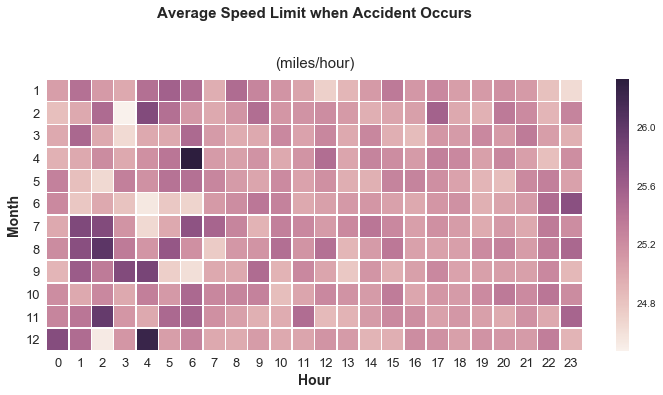

In [550]:
pl.figure(figsize=(12,5))
pl.suptitle('Average Speed Limit when Accident Occurs',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('(miles/hour)',fontsize=15,y=1.02)
sns.heatmap(speedlimitnew, linewidths=0.5)
pl.xlabel('Hour', fontsize=14, fontweight='bold')
pl.ylabel('Month', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

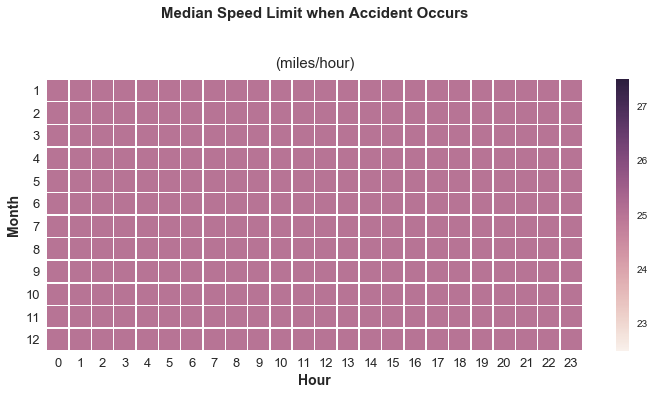

In [552]:
pl.figure(figsize=(12,5))
pl.suptitle('Median Speed Limit when Accident Occurs',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('(miles/hour)',fontsize=15,y=1.02)
sns.heatmap(speedlimitnewmed, linewidths=0.5)
pl.xlabel('Hour', fontsize=14, fontweight='bold')
pl.ylabel('Month', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

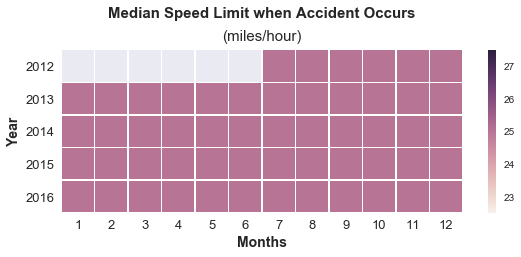

In [543]:
pl.figure(figsize=(9,3))
pl.suptitle('Median Speed Limit when Accident Occurs',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('(miles/hour)',fontsize=15,y=1.02)
sns.heatmap(speedlimitmed, linewidths=0.5)
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

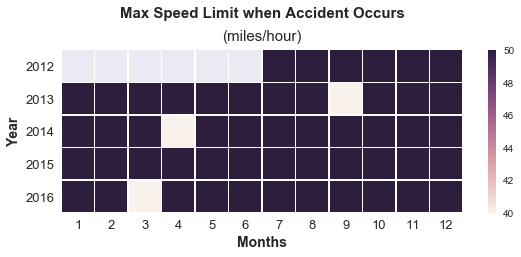

In [544]:
pl.figure(figsize=(9,3))
pl.suptitle('Max Speed Limit when Accident Occurs',fontsize=15,fontweight='bold',y=1.08, x=0.435)
pl.title('(miles/hour)',fontsize=15,y=1.02)
sns.heatmap(speedlimitmax, linewidths=0.5)
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Year', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

In [553]:
perhour = df2.groupby(['MONTH', 'HOUR']).size().reset_index()

In [556]:
perhour = perhour.pivot_table(index='MONTH',columns='HOUR',values=0)

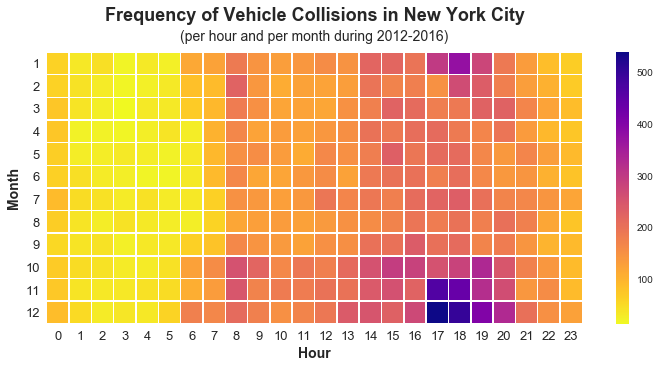

In [634]:
pl.figure(figsize=(12,5))
pl.suptitle('Frequency of Vehicle Collisions in New York City',fontsize=18,fontweight='bold',y=1.005, x=0.435)
pl.title('(per hour and per month during 2012-2016)',fontsize=14,y=1.02)
sns.heatmap(perhour, linewidths=0.5, cmap='plasma_r')
pl.xlabel('Hour', fontsize=14, fontweight='bold')
pl.ylabel('Month', fontsize=14, fontweight='bold')
pl.xticks(rotation=0, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()